In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\bless\Downloads\cust_seg.csv"
chunk_size = 10000
data = pd.DataFrame()

for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    data = pd.concat([data, chunk], ignore_index=True)

C:\Users\bless\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,2015-02-28,1183296,N,ES,H,27,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,1
999996,999996,2015-02-28,1183295,N,ES,H,56,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,0
999997,999997,2015-02-28,1183294,N,ES,V,39,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,1
999998,999998,2015-02-28,1183293,N,ES,V,36,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,1


In [3]:
data.shape

(1000000, 48)

In [4]:
print("Basic Dataset Information:")
print(data.info())

print("\nBasic Statistics:")
print(data.describe())

print("\nFirst 5 Rows of Dataset:")
print(data.head())

Basic Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 48 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1000000 non-null  int64  
 1   fecha_dato             1000000 non-null  object 
 2   ncodpers               1000000 non-null  int64  
 3   ind_empleado           989218 non-null   object 
 4   pais_residencia        989218 non-null   object 
 5   sexo                   989214 non-null   object 
 6   age                    1000000 non-null  object 
 7   fecha_alta             989218 non-null   object 
 8   ind_nuevo              989218 non-null   float64
 9   antiguedad             1000000 non-null  object 
 10  indrel                 989218 non-null   float64
 11  ult_fec_cli_1t         1101 non-null     object 
 12  indrel_1mes            989218 non-null   float64
 13  tiprel_1mes            989218 non-null   objec

In [5]:
missing_values = data.isnull().sum()
print("\nMissing Values in Dataset:")
print(missing_values)


Missing Values in Dataset:
Unnamed: 0                    0
fecha_dato                    0
ncodpers                      0
ind_empleado              10782
pais_residencia           10782
sexo                      10786
age                           0
fecha_alta                10782
ind_nuevo                 10782
antiguedad                    0
indrel                    10782
ult_fec_cli_1t           998899
indrel_1mes               10782
tiprel_1mes               10782
indresi                   10782
indext                    10782
conyuemp                 999822
canal_entrada             10861
indfall                   10782
tipodom                   10782
cod_prov                  17734
nomprov                   17734
ind_actividad_cliente     10782
renta                    175183
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju_fin_ult1             0
ind_ctma_fin

In [6]:
duplicates = data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")


Number of Duplicate Rows: 0


In [13]:
# Define a dictionary with old column names as keys and new descriptive names as values
column_renames = {
    'fecha_dato': 'Partition_Date',
    'ncodpers': 'Customer_Code',
    'ind_empleado': 'Employee_Index',
    'pais_residencia': 'Country_Residence',
    'sexo': 'Gender',
    'age': 'Age',
    'fecha_alta': 'First_Contract_Date',
    'ind_nuevo': 'New_Customer_Index',
    'antiguedad': 'Customer_Seniority',
    'indrel': 'Primary_Customer_Status',
    'ult_fec_cli_1t': 'Last_Primary_Customer_Date',
    'indrel_1mes': 'Customer_Type_Begin_Month',
    'tiprel_1mes': 'Customer_Relation_Begin_Month',
    'indresi': 'Residence_Index',
    'indext': 'Foreigner_Index',
    'conyuemp': 'Spouse_Index',
    'canal_entrada': 'Joining_Channel',
    'indfall': 'Deceased_Index',
    'tipodom': 'Address_Type',
    'cod_prov': 'Province_Code',
    'nomprov': 'Province_Name',
    'ind_actividad_cliente': 'Customer_Activity_Index',
    'renta': 'Gross_Household_Income',
    'ind_ahor_fin_ult1': 'Saving_Account',
    'ind_aval_fin_ult1': 'Guarantees',
    'ind_cco_fin_ult1': 'Current_Accounts',
    'ind_cder_fin_ult1': 'Derivada_Account',
    'ind_cno_fin_ult1': 'Payroll_Account',
    'ind_ctju_fin_ult1': 'Junior_Account',
    'ind_ctma_fin_ult1': 'Más_Particular_Account',
    'ind_ctop_fin_ult1': 'Particular_Account',
    'ind_ctpp_fin_ult1': 'Particular_Plus_Account',
    'ind_deco_fin_ult1': 'Short_Term_Deposits',
    'ind_deme_fin_ult1': 'Medium_Term_Deposits',
    'ind_dela_fin_ult1': 'Long_Term_Deposits',
    'ind_ecue_fin_ult1': 'E_Account',
    'ind_fond_fin_ult1': 'Funds',
    'ind_hip_fin_ult1': 'Mortgage',
    'ind_plan_fin_ult1': 'Pensions',
    'ind_pres_fin_ult1': 'Loans',
    'ind_reca_fin_ult1': 'Taxes',
    'ind_tjcr_fin_ult1': 'Credit_Card',
    'ind_valo_fin_ult1': 'Securities',
    'ind_viv_fin_ult1': 'Home_Account',
    'ind_nomina_ult1': 'Payroll',
    'ind_nom_pens_ult1': 'Pensions_Account',
    'ind_recibo_ult1': 'Direct_Debit'
}

# Rename the columns
data.rename(columns=column_renames, inplace=True)

# Display the first few rows to verify the changes
print("\nRenamed Columns Dataset:")
print(data.head())



Renamed Columns Dataset:
   Unnamed: 0 Partition_Date  Customer_Code Employee_Index Country_Residence  \
0           0     2015-01-28        1375586   Not_Employee                ES   
1           1     2015-01-28        1050611   Not_Employee                ES   
2           2     2015-01-28        1050612   Not_Employee                ES   
3           3     2015-01-28        1050613   Not_Employee                ES   
4           4     2015-01-28        1050614   Not_Employee                ES   

   Gender  Age First_Contract_Date  New_Customer_Index Customer_Seniority  \
0    Male   35          2015-01-12                 0.0                  6   
1  Female   23          2012-08-10                 0.0                 35   
2  Female   23          2012-08-10                 0.0                 35   
3    Male   22          2012-08-10                 0.0                 35   
4  Female   23          2012-08-10                 0.0                 35   

   ...  Mortgage Pensions  Loa

In [9]:
# Map 'Employee_Index' values to meaningful labels
employee_index_map = {
    'A': 'Active',
    'B': 'Ex-Employee',
    'F': 'Filial',
    'N': 'Not_Employee',
    'P': 'Passive'
}

data['Employee_Index'] = data['Employee_Index'].map(employee_index_map)

# Map 'Gender' values to meaningful labels
gender_map = {
    'H': 'Male',
    'V': 'Female'
}

data['Gender'] = data['Gender'].map(gender_map)

# Map 'Residence_Index' values to meaningful labels
residence_index_map = {
    'S': 'Resident',
    'N': 'Non-Resident'
}

data['Residence_Index'] = data['Residence_Index'].map(residence_index_map)

# Map 'Foreigner_Index' values to meaningful labels
foreigner_index_map = {
    'S': 'Foreigner',
    'N': 'Local'
}

data['Foreigner_Index'] = data['Foreigner_Index'].map(foreigner_index_map)

# Map 'Deceased_Index' values to meaningful labels
deceased_index_map = {
    'S': 'Deceased',
    'N': 'Alive'
}

data['Deceased_Index'] = data['Deceased_Index'].map(deceased_index_map)

# After mapping, let's display the value counts for these columns
print("\nUnique Values in 'Employee_Index' column after mapping:")
print(data['Employee_Index'].value_counts())

print("\nUnique Values in 'Gender' column after mapping:")
print(data['Gender'].value_counts())

print("\nUnique Values in 'Residence_Index' column after mapping:")
print(data['Residence_Index'].value_counts())

print("\nUnique Values in 'Foreigner_Index' column after mapping:")
print(data['Foreigner_Index'].value_counts())

print("\nUnique Values in 'Deceased_Index' column after mapping:")
print(data['Deceased_Index'].value_counts())

# Check for 'Country_Residence' column again for better readability
print("\nUnique Values in 'Country_Residence' column:")
print(data['Country_Residence'].value_counts())



Unique Values in 'Employee_Index' column after mapping:
Employee_Index
Not_Employee    988260
Ex-Employee        387
Active             287
Filial             282
Name: count, dtype: int64

Unique Values in 'Gender' column after mapping:
Gender
Female    562000
Male      427214
Name: count, dtype: int64

Unique Values in 'Residence_Index' column after mapping:
Residence_Index
Resident        982264
Non-Resident      6954
Name: count, dtype: int64

Unique Values in 'Foreigner_Index' column after mapping:
Foreigner_Index
Local        946328
Foreigner     42890
Name: count, dtype: int64

Unique Values in 'Deceased_Index' column after mapping:
Deceased_Index
Alive       986107
Deceased      3111
Name: count, dtype: int64

Unique Values in 'Country_Residence' column:
Country_Residence
ES    982264
FR       546
AR       542
DE       487
GB       480
       ...  
TN         2
LB         2
GE         2
BZ         2
AL         1
Name: count, Length: 113, dtype: int64



Summary Statistics for Numerical Columns:
           Unnamed: 0  Customer_Code  New_Customer_Index  \
count  1000000.000000   1.000000e+06       989218.000000   
mean    499999.500000   6.905967e+05            0.000489   
std     288675.278932   4.044084e+05            0.022114   
min          0.000000   1.588900e+04            0.000000   
25%     249999.750000   3.364110e+05            0.000000   
50%     499999.500000   6.644760e+05            0.000000   
75%     749999.250000   1.074511e+06            0.000000   
max     999999.000000   1.379131e+06            1.000000   

       Primary_Customer_Status  Customer_Type_Begin_Month  Address_Type  \
count            989218.000000              989218.000000      989218.0   
mean                  1.109074                   1.000085           1.0   
std                   3.267624                   0.012954           0.0   
min                   1.000000                   1.000000           1.0   
25%                   1.000000           

C:\Users\bless\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


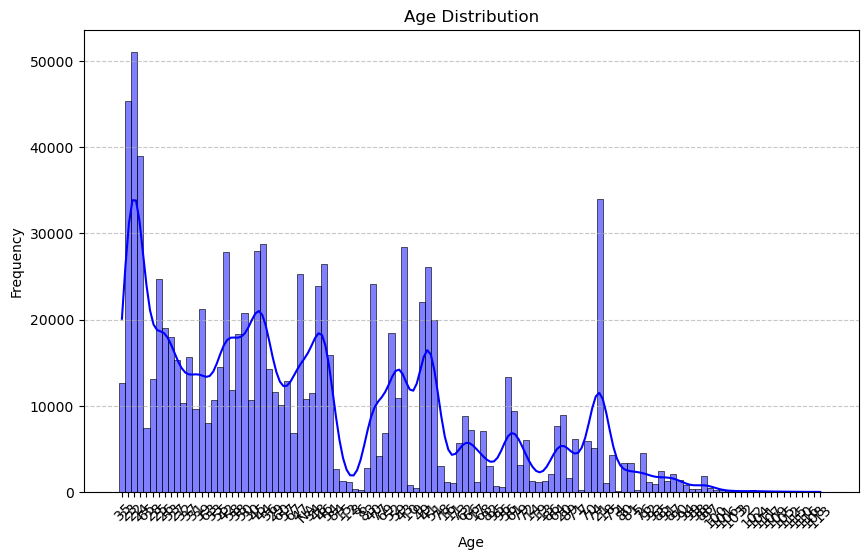

C:\Users\bless\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


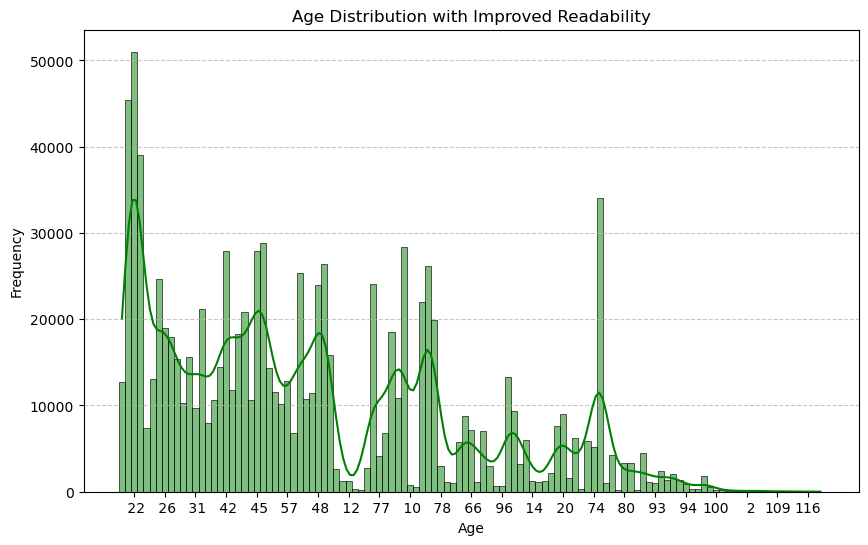

C:\Users\bless\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


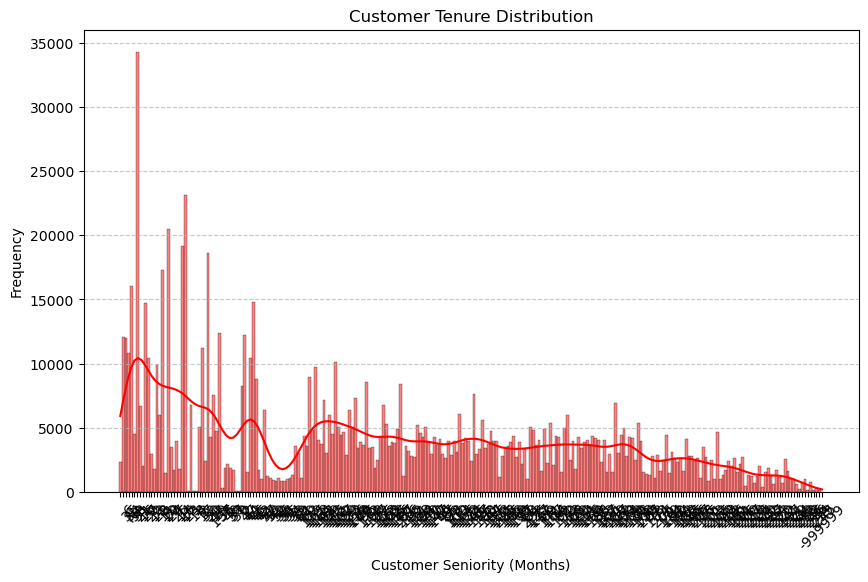

C:\Users\bless\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


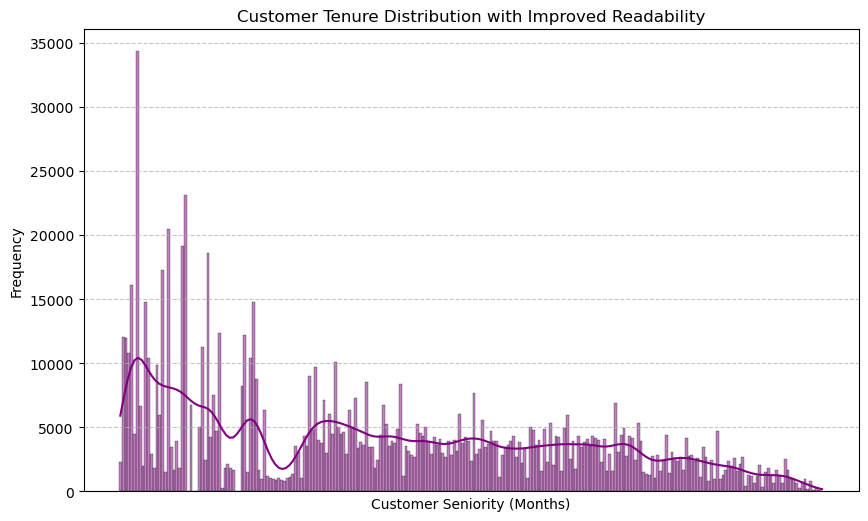


Summary Statistics for Numerical Columns:
           Unnamed: 0  Customer_Code  New_Customer_Index  \
count  1000000.000000   1.000000e+06       989218.000000   
mean    499999.500000   6.905967e+05            0.000489   
std     288675.278932   4.044084e+05            0.022114   
min          0.000000   1.588900e+04            0.000000   
25%     249999.750000   3.364110e+05            0.000000   
50%     499999.500000   6.644760e+05            0.000000   
75%     749999.250000   1.074511e+06            0.000000   
max     999999.000000   1.379131e+06            1.000000   

       Primary_Customer_Status  Customer_Type_Begin_Month  Address_Type  \
count            989218.000000              989218.000000      989218.0   
mean                  1.109074                   1.000085           1.0   
std                   3.267624                   0.012954           0.0   
min                   1.000000                   1.000000           1.0   
25%                   1.000000           

C:\Users\bless\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


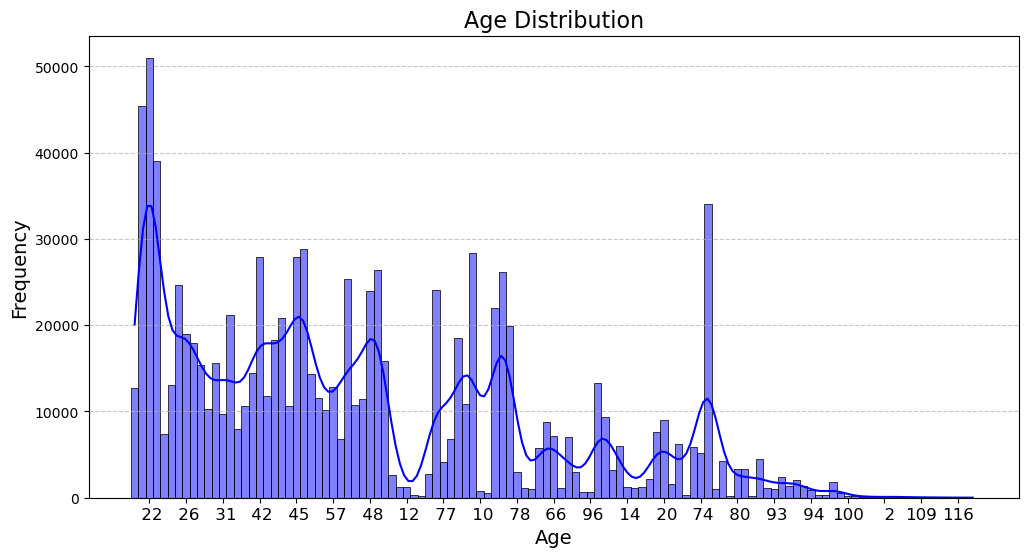

C:\Users\bless\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


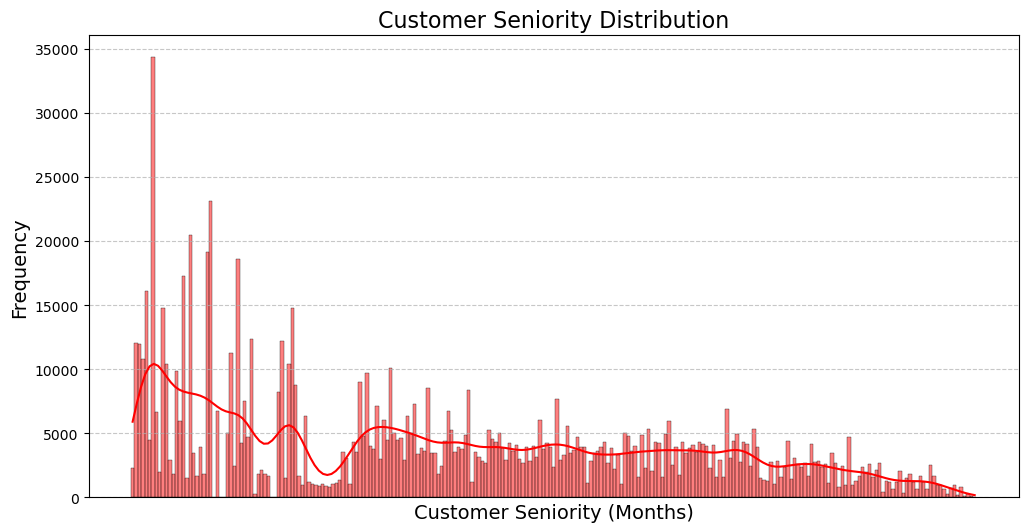

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(data.describe())

# Age Distribution Visualization
plt.figure(figsize=(12, 6))
sns.histplot(data['Age'].dropna(), bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Improve x-axis readability with larger font and more spaced ticks
age_min, age_max = int(data['Age'].min()), int(data['Age'].max())
plt.xticks(range(age_min, age_max + 1, 5), fontsize=12, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Customer Seniority (Tenure) Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Customer_Seniority'].dropna(), bins=30, kde=True, color='red', edgecolor='black')
plt.title('Customer Seniority Distribution', fontsize=16)
plt.xlabel('Customer Seniority (Months)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Improve x-axis readability with better tick placement
tenure_min, tenure_max = int(data['Customer_Seniority'].min()), int(data['Customer_Seniority'].max())
plt.xticks(range(tenure_min, tenure_max + 1, 12), fontsize=12, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


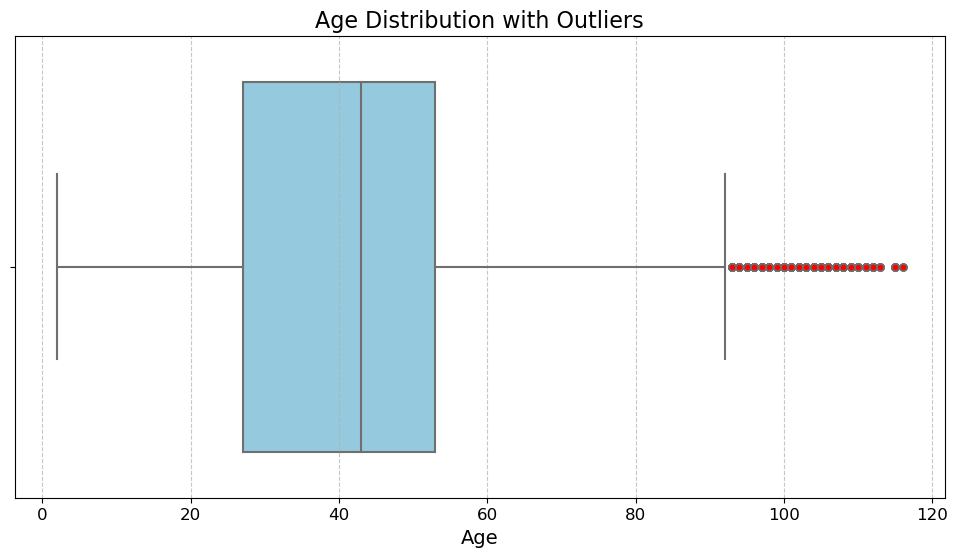

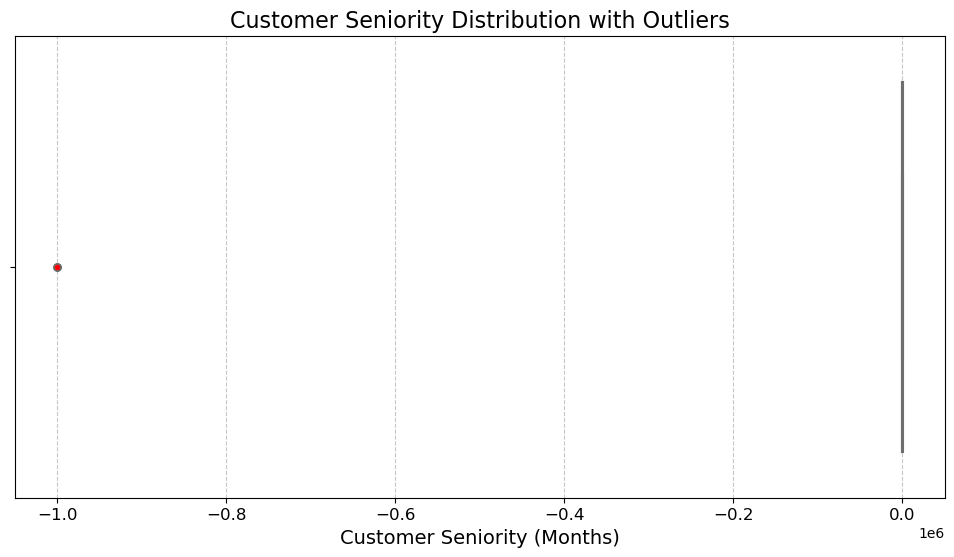

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Age' and 'Customer_Seniority' to numeric, coercing errors to NaN
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Customer_Seniority'] = pd.to_numeric(data['Customer_Seniority'], errors='coerce')

# Handle missing values by dropping rows with NaN values (optional: you could use imputation)
data.dropna(subset=['Age', 'Customer_Seniority'], inplace=True)

# Boxplot to visualize outliers in 'Age'
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Age', color='skyblue', showfliers=True, flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 5})
plt.title('Age Distribution with Outliers', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.xticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Boxplot to visualize outliers in 'Customer_Seniority'
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Customer_Seniority', color='lightcoral', showfliers=True, flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 5})
plt.title('Customer Seniority Distribution with Outliers', fontsize=16)
plt.xlabel('Customer Seniority (Months)', fontsize=14)
plt.xticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


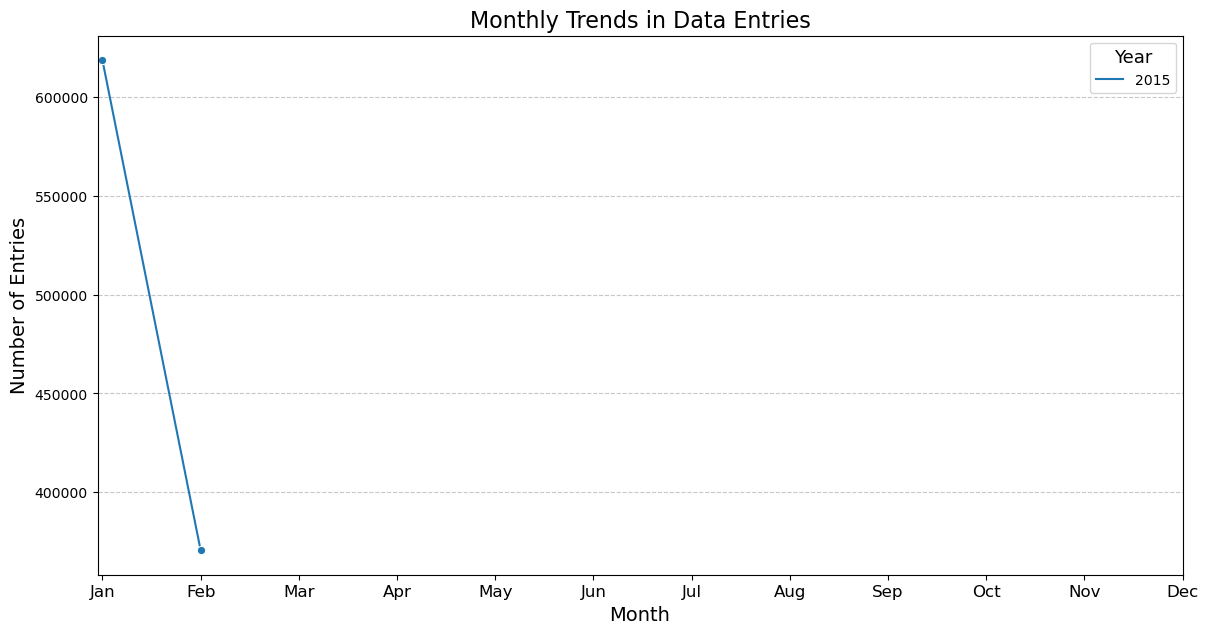

In [17]:
import warnings
from pandas.errors import SettingWithCopyWarning  # Import SettingWithCopyWarning
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress specific warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=SettingWithCopyWarning)

# Convert 'Partition_Date' to datetime format
data['Partition_Date'] = pd.to_datetime(data['Partition_Date'], format='%Y-%m-%d', errors='coerce')

# Drop any rows where date conversion failed (optional step)
data.dropna(subset=['Partition_Date'], inplace=True)

# Extract year and month from 'Partition_Date'
data['Year'] = data['Partition_Date'].dt.year
data['Month'] = data['Partition_Date'].dt.month

# Group data by year and month to visualize trends
monthly_trends = data.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Visualize trends over time
plt.figure(figsize=(14, 7))

# Create a lineplot with month on x-axis and count on y-axis, grouped by Year
sns.lineplot(
    x='Month', 
    y='Count', 
    hue='Year', 
    data=monthly_trends, 
    marker='o', 
    palette='tab10'
)

# Improve x-axis by formatting and adding month names
plt.title('Monthly Trends in Data Entries', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Entries', fontsize=14)

# Set the x-ticks to show month names
plt.xticks(
    ticks=range(1, 13), 
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    fontsize=12
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add gridlines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.legend(title='Year', title_fontsize='13')
plt.show()


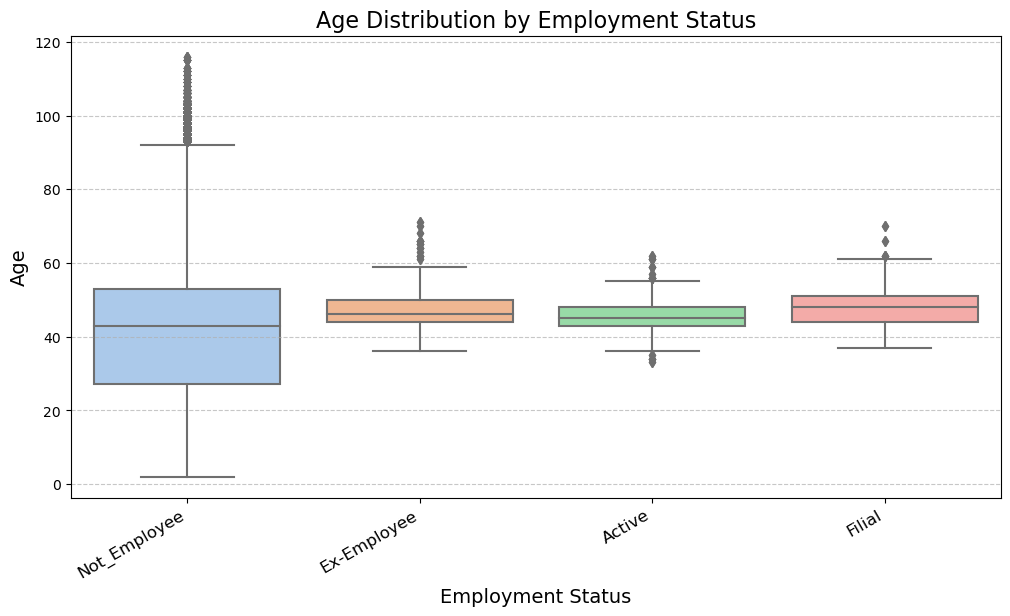

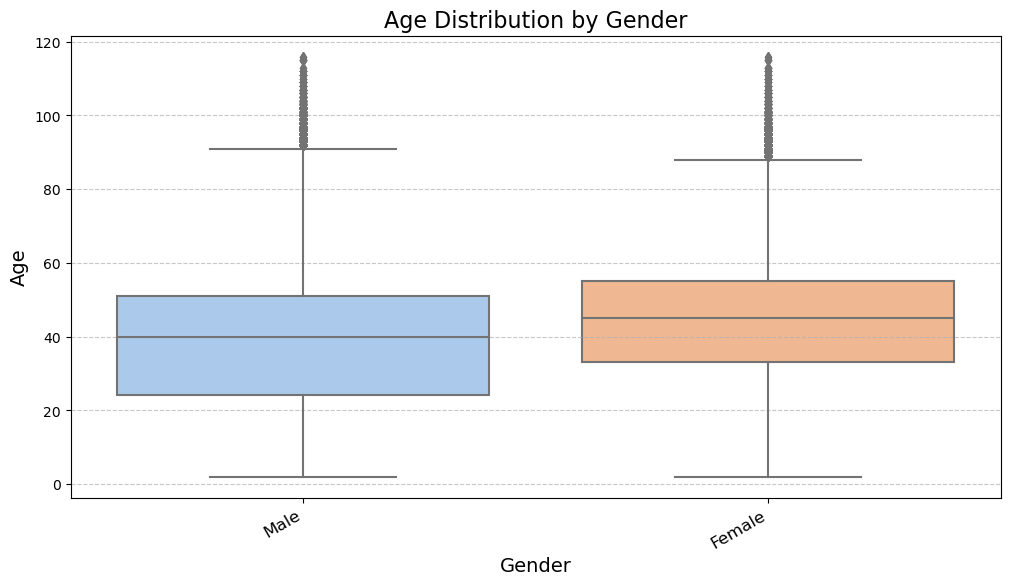

In [20]:
# Age Distribution by Employment Status
if 'Employee_Index' in data.columns and 'Age' in data.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        x='Employee_Index', 
        y='Age', 
        data=data, 
        palette='pastel', 
        order=data['Employee_Index'].value_counts().index
    )
    plt.title('Age Distribution by Employment Status', fontsize=16)
    plt.xlabel('Employment Status', fontsize=14)
    plt.ylabel('Age', fontsize=14)
    plt.xticks(rotation=30, ha='right', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("One or both of the required columns are missing in the dataset.")

# Age Distribution by Gender
if 'Gender' in data.columns and 'Age' in data.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        x='Gender', 
        y='Age', 
        data=data, 
        palette='pastel'
    )
    plt.title('Age Distribution by Gender', fontsize=16)
    plt.xlabel('Gender', fontsize=14)
    plt.ylabel('Age', fontsize=14)
    plt.xticks(rotation=30, ha='right', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("One or both of the required columns are missing in the dataset.")


